# Chapter 8 Tree-Based Methods

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image
from io import StringIO
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

%matplotlib inline

### Udf

In [7]:
def print_tree(estimator, features, class_names=None, filled=True):
    '''
    Creates images of tree models using pydot.
    '''
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return graph

## 8.3.1 Fitting Classification Trees

**pd.factorize** - Encode the object as an enumerated type or categorical variable. This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. 

In [15]:
url_path = os.path.abspath('..')
carseats = pd.read_csv(url_path + '/data/Carseats.csv')
carseats['is_sales_high'] = carseats['Sales'].map(lambda x: 1 if x > 8 else 0)
carseats['ShelveLoc'] = pd.factorize(carseats['ShelveLoc'])[0]
carseats['Urban'] = carseats['Urban'].map({'No':0, 'Yes': 1})
carseats['US'] = carseats['US'].map({'No': 0, 'Yes': 1})
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,is_sales_high
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [16]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          400 non-null    float64
 1   CompPrice      400 non-null    int64  
 2   Income         400 non-null    int64  
 3   Advertising    400 non-null    int64  
 4   Population     400 non-null    int64  
 5   Price          400 non-null    int64  
 6   ShelveLoc      400 non-null    int64  
 7   Age            400 non-null    int64  
 8   Education      400 non-null    int64  
 9   Urban          400 non-null    int64  
 10  US             400 non-null    int64  
 11  is_sales_high  400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [17]:
X = carseats.drop(['Sales', 'is_sales_high'], axis=1)
y = carseats['is_sales_high']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [21]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)
train_accuracy = clf.score(X_train, y_train)

print("Training Set Accuracy Score: {:.1%}".format(train_accuracy))

Training Set Accuracy Score: 95.5%


In [23]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       118
           1       0.74      0.61      0.67        82

    accuracy                           0.75       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.75      0.75       200



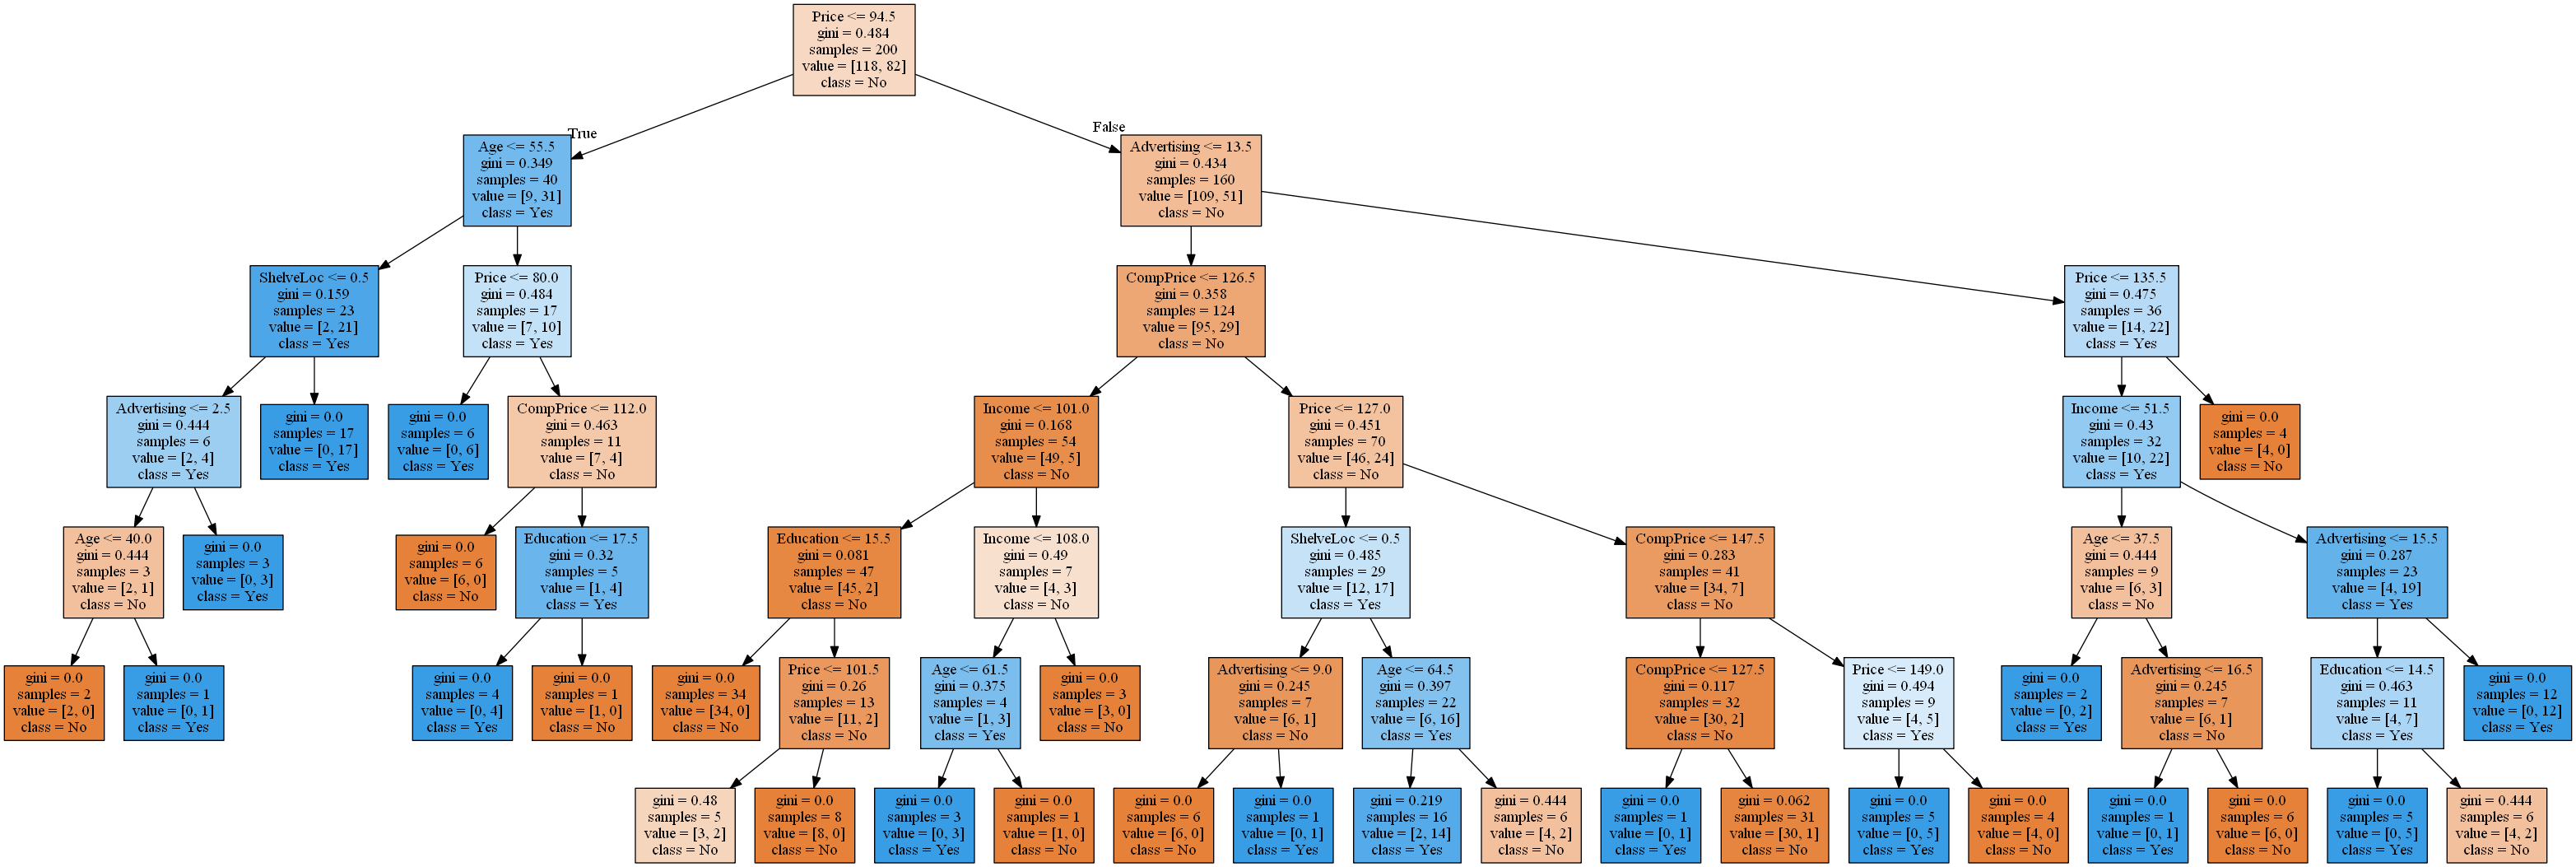

In [24]:
graph3, = print_tree(clf, features=X.columns, class_names=['No', 'Yes'])
Image(graph3.create_png())